**Outliers**

In [45]:
import pandas as pd

# بارگذاری مجموعه داده
data = pd.read_csv('train.csv')
data.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


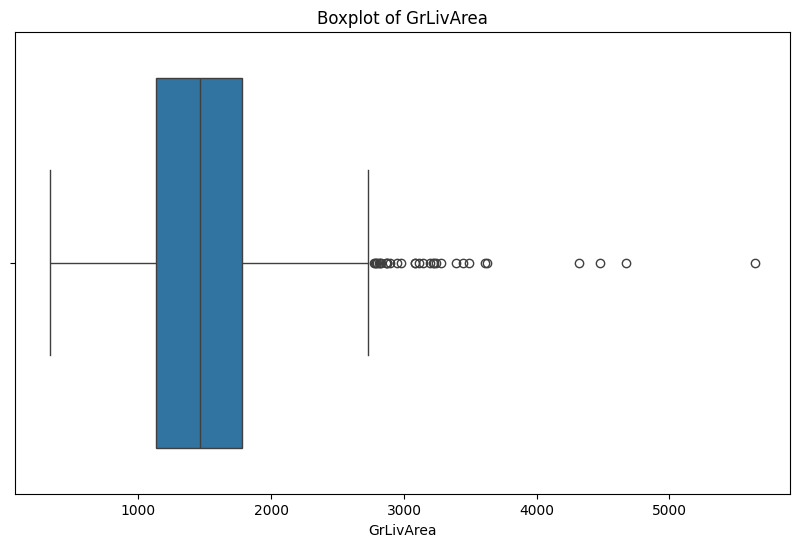

In [33]:
import matplotlib.pyplot as plt
import seaborn as sns

# باکس‌پلات
plt.figure(figsize=(10, 6))
sns.boxplot(x=data['GrLivArea'])
plt.title('Boxplot of GrLivArea')
plt.show()


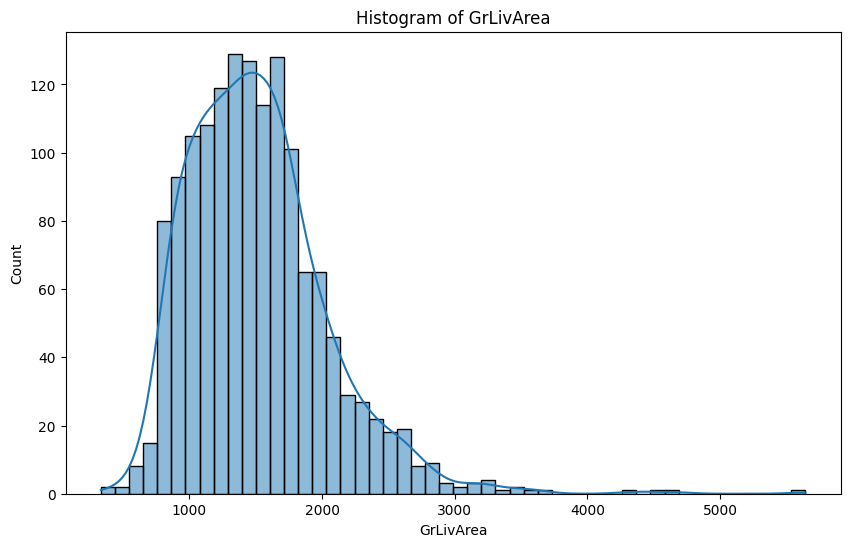

In [34]:
# هیستوگرام
plt.figure(figsize=(10, 6))
sns.histplot(data['GrLivArea'], bins=50, kde=True)
plt.title('Histogram of GrLivArea')
plt.show()


In [ ]:
# محاسبه چارک‌ها
Q1 = data['GrLivArea'].quantile(0.25)
Q3 = data['GrLivArea'].quantile(0.75)
IQR = Q3 - Q1

# تعیین محدوده
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
print(lower_bound)
print(upper_bound)
# شناسایی داده‌های پرت
outliers_iqr = data[(data['GrLivArea'] < lower_bound) | (data['GrLivArea'] > upper_bound)]
print(f"تعداد داده‌های پرت با IQR در GrLivArea: {outliers_iqr.shape[0]}")


158.625
2747.625
تعداد داده‌های پرت با IQR در GrLivArea: 31


In [43]:
data

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,RL,62.0,7917,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,175000
1456,1457,20,RL,85.0,13175,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,2,2010,WD,Normal,210000
1457,1458,70,RL,66.0,9042,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,GdPrv,Shed,2500,5,2010,WD,Normal,266500
1458,1459,20,RL,68.0,9717,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,142125


In [44]:
# حذف داده‌های پرت با استفاده از IQR
data_cleaned = data[(data['GrLivArea'] >= lower_bound) & (data['GrLivArea'] <= upper_bound)]
print(f"تعداد داده‌ها پس از حذف پرت‌ها: {data_cleaned.shape[0]}")


تعداد داده‌ها پس از حذف پرت‌ها: 1429


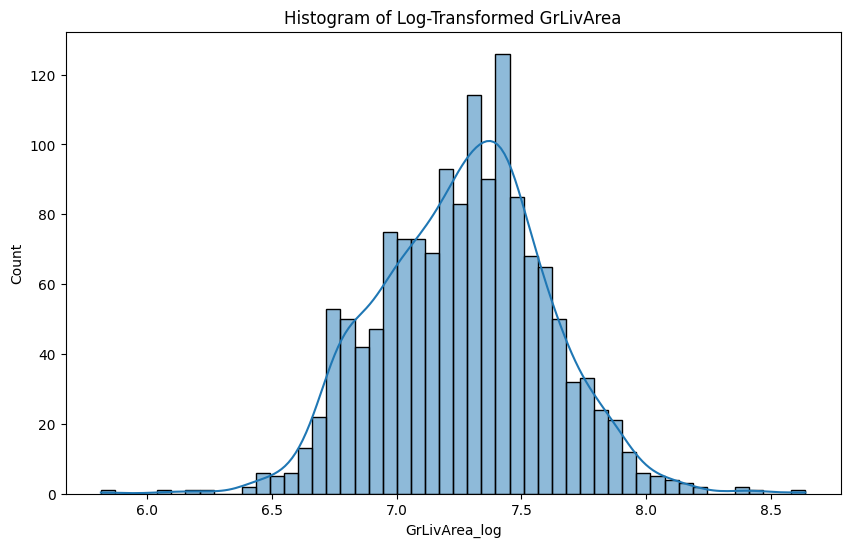

In [46]:
import numpy as np

# تبدیل لگاریتمی
data['GrLivArea_log'] = np.log1p(data['GrLivArea'])

# نمایش توزیع جدید
plt.figure(figsize=(10, 6))
sns.histplot(data['GrLivArea_log'], bins=50, kde=True)
plt.title('Histogram of Log-Transformed GrLivArea')
plt.show()


**Missing values**

In [47]:
import pandas as pd

# بارگذاری مجموعه داده
data = pd.read_csv('train.csv')


In [48]:
# نمایش اطلاعات کلی
data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [49]:
# تعداد مقادیر گمشده در هر ستون
missing_values = data.isnull().sum()
missing_values = missing_values[missing_values > 0]
print(missing_values)


LotFrontage      259
Alley           1369
MasVnrType       872
MasVnrArea         8
BsmtQual          37
BsmtCond          37
BsmtExposure      38
BsmtFinType1      37
BsmtFinType2      38
Electrical         1
FireplaceQu      690
GarageType        81
GarageYrBlt       81
GarageFinish      81
GarageQual        81
GarageCond        81
PoolQC          1453
Fence           1179
MiscFeature     1406
dtype: int64


In [50]:
# درصد مقادیر گمشده
missing_percent = missing_values / len(data) * 100
missing_data = pd.DataFrame({'Total': missing_values, 'Percent': missing_percent})
missing_data.sort_values(by='Percent', ascending=False, inplace=True)
print(missing_data)


              Total    Percent
PoolQC         1453  99.520548
MiscFeature    1406  96.301370
Alley          1369  93.767123
Fence          1179  80.753425
MasVnrType      872  59.726027
FireplaceQu     690  47.260274
LotFrontage     259  17.739726
GarageType       81   5.547945
GarageYrBlt      81   5.547945
GarageFinish     81   5.547945
GarageQual       81   5.547945
GarageCond       81   5.547945
BsmtFinType2     38   2.602740
BsmtExposure     38   2.602740
BsmtFinType1     37   2.534247
BsmtCond         37   2.534247
BsmtQual         37   2.534247
MasVnrArea        8   0.547945
Electrical        1   0.068493


In [51]:
# حذف ستون‌هایی با بیش از 50% مقادیر گمشده
cols_to_drop = missing_data[missing_data['Percent'] > 50].index
data.drop(cols_to_drop, axis=1, inplace=True)


In [ ]:
# حذف سطرهای دارای مقادیر گمشده
data_dropped = data.dropna()


In [ ]:
# جایگزینی با میانگین
data['LotFrontage'].fillna(data['LotFrontage'].mean(), inplace=True)


In [ ]:
# جایگزینی با مد
data['Electrical'].fillna(data['Electrical'].mode()[0], inplace=True)


In [ ]:
# جایگزینی با مقدار ثابت
data['Alley'].fillna('NoAlley', inplace=True)


**Imbalance Dataset**

In [52]:
import pandas as pd

# بارگذاری مجموعه داده
data = pd.read_csv('creditcard.csv')
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

Class
0    284315
1       492
Name: count, dtype: int64


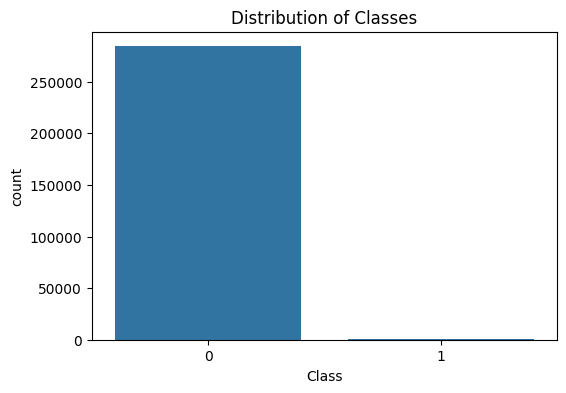

In [53]:
# توزیع کلاس‌ها
class_counts = data['Class'].value_counts()
print(class_counts)

# نمودار ستونی
plt.figure(figsize=(6,4))
sns.countplot(x='Class', data=data)
plt.title('Distribution of Classes')
plt.show()


In [54]:
from sklearn.model_selection import train_test_split
X = data.drop('Class', axis=1)
y = data['Class']

# تقسیم داده‌ها
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
len(X_train)

227845